In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os 
import cv2

def preprocessImg(img, new_width=30, new_height=30):
    new_dim = (new_width, new_height)
    return cv2.resize(img, new_dim, interpolation=cv2.INTER_LINEAR)

def PCA(data, n_components=3):
    mean_vector = np.mean(data, axis=0)
    std_vector = np.std(data, axis=0)

    centered_data = data - mean_vector
    standardized_data = centered_data / std_vector

    cov = np.cov(standardized_data.T)
    eig_values, eig_vectors = np.linalg.eig(cov)

    max_indexes = []
    for i in range(0, n_components):
        maxIndex = np.argmax(eig_values)
        max_indexes.append(maxIndex)
        eig_values[maxIndex] = 0

    final_features = eig_vectors[:, max_indexes]
    projected_data = (np.dot(standardized_data, final_features))

    return projected_data

class K_means:
    
    def __init__(self, n_clusters=2, tol=0.0001, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data, initial_centroids):
        self.centroids = {}
        for i in range(self.n_clusters):
            self.centroids[i] = data[initial_centroids[i]]

        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.n_clusters):
                self.classifications[i] = []


            for datapoint in data:
                distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(datapoint)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                centroidMovement = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
                if centroidMovement > self.tol:
                    optimized = False

            if optimized:
                break
                
                
    def predict(self, datapoint):
        distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [5]:
def display(a, b, c, title1="Original", title2="Edited1", title3 = "Edited2"):
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def display_one(a, title1="Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

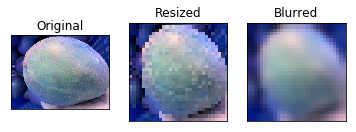

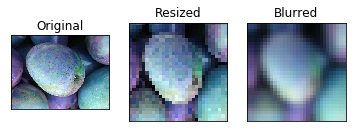

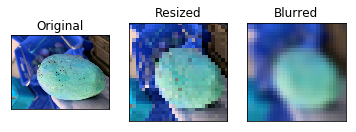

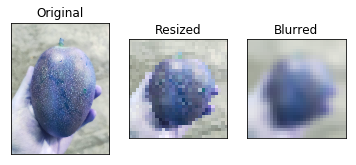

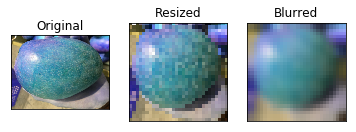

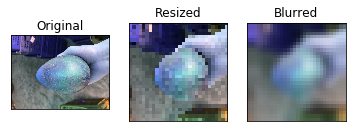

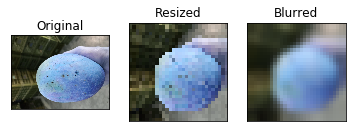

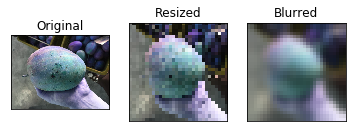

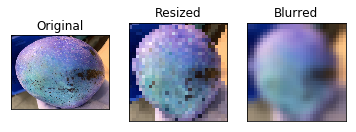

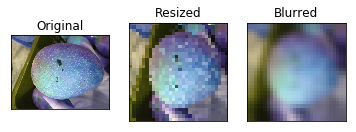

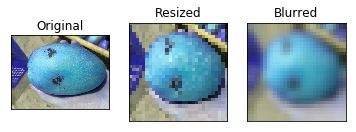

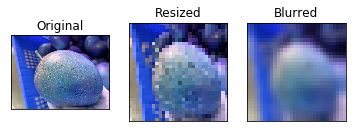

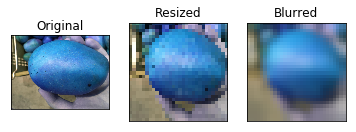

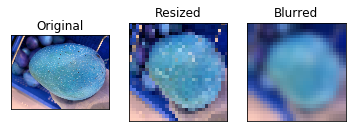

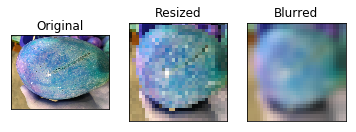

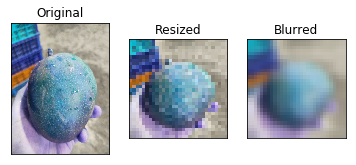

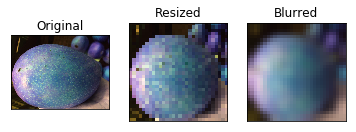

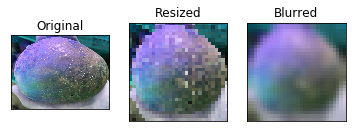

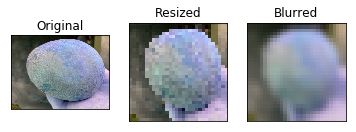

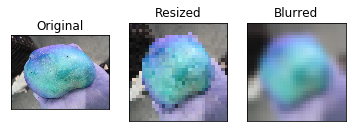

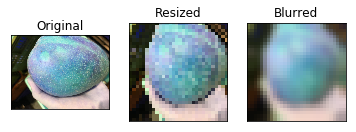

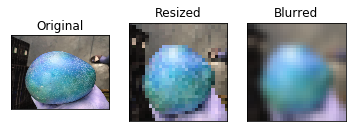

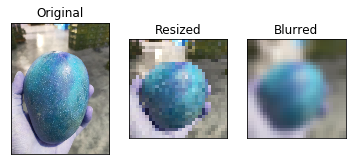

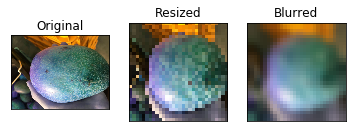

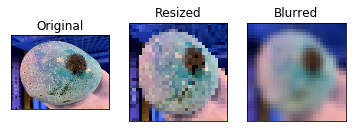

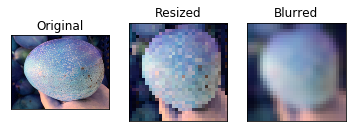

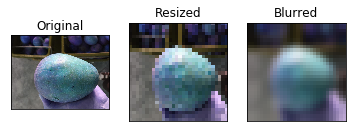

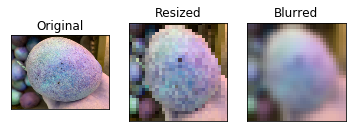

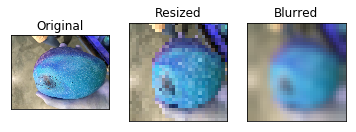

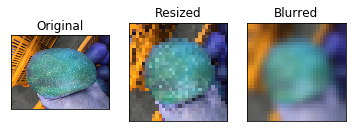

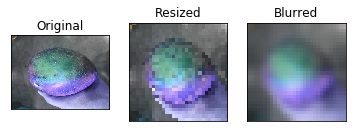

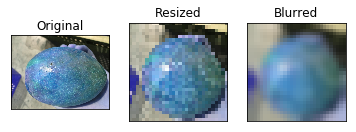

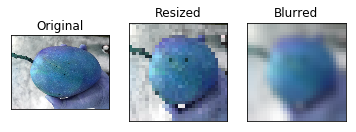

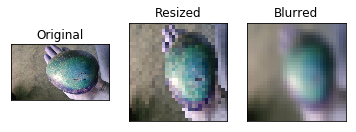

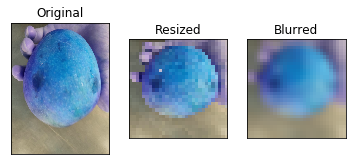

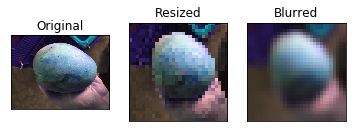

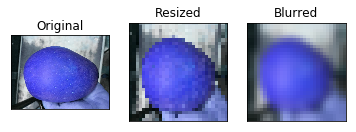

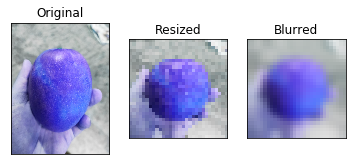

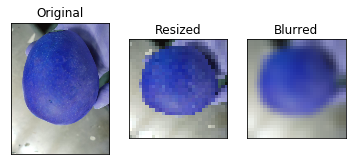

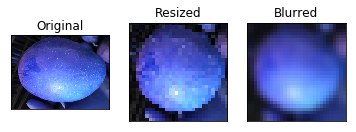

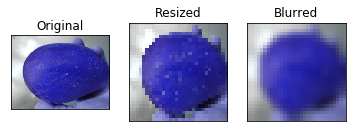

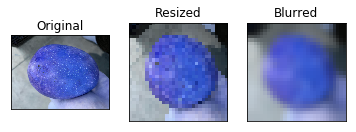

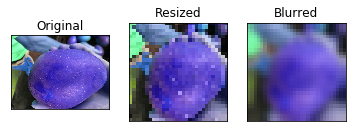

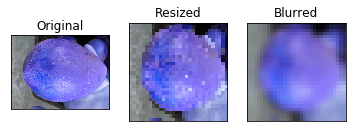

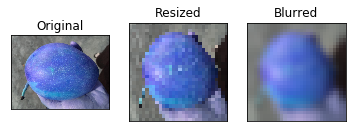

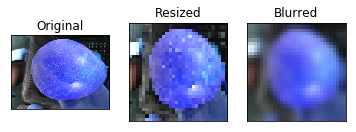

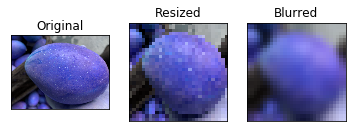

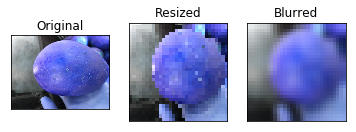

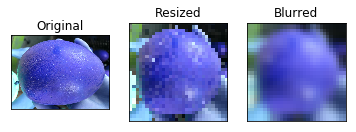

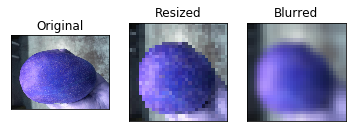

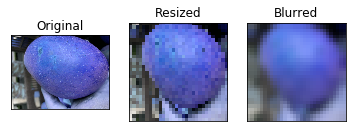

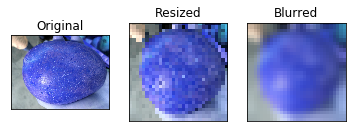

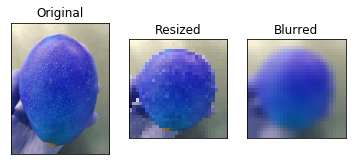

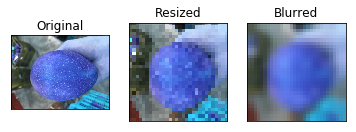

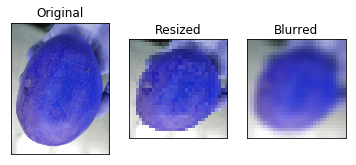

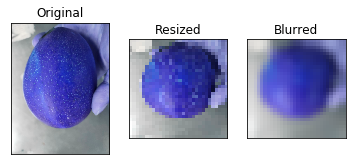

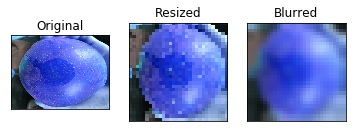

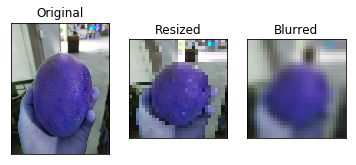

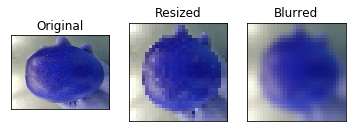

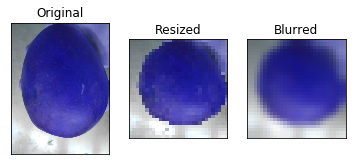

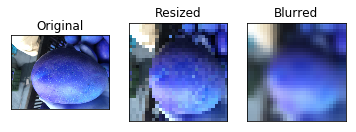

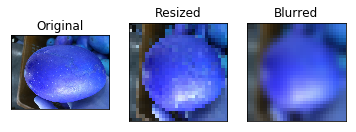

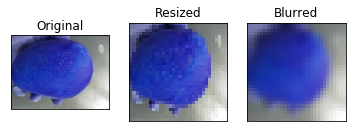

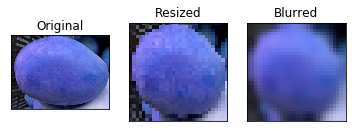

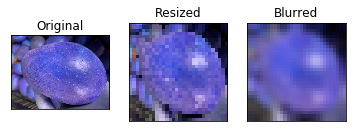

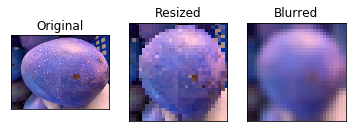

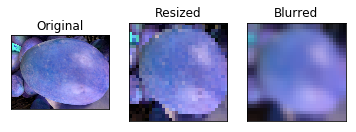

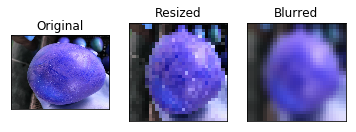

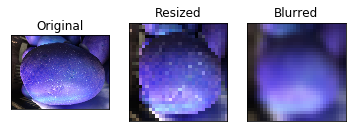

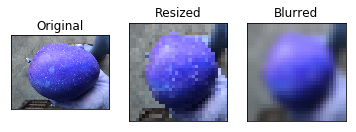

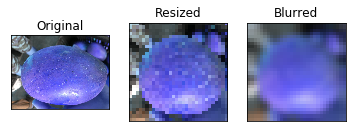

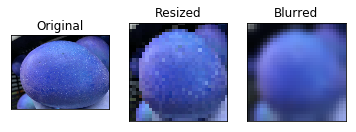

72
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


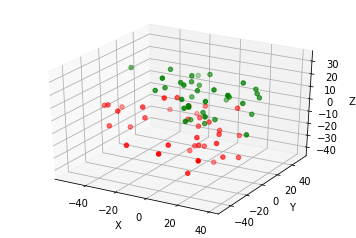

In [6]:
imgSet = []
raw_images = []

path = './sum/green/'
files = os.listdir(path)
#train_green = []

for file in files:
    
    p = path + file
    img = cv2.imread(p)
    
    raw_images.append(img)
    resized_img = preprocessImg(img)
    blurred_img = cv2.GaussianBlur(resized_img, (5, 5), 0) # apply Gausian blur
    imgVector = blurred_img.flatten(order='C')
    imgSet.append(imgVector)
    display(img, resized_img, blurred_img, "Original", "Resized", "Blurred")

path = './sum/red/'
files = os.listdir(path)


for file in files:
    p = path + file
    img = cv2.imread(p)

    raw_images.append(img)
    resized_img = preprocessImg(img)
    blurred_img = cv2.GaussianBlur(resized_img, (5, 5), 0) # apply Gausian blur
    imgVector = blurred_img.flatten(order='C')
    imgSet.append(imgVector)
    display(img, resized_img, blurred_img, "Original", "Resized", "Blurred")


    
    
    
imgSet = np.asarray(imgSet)

transformed_data = PCA(imgSet)
transformed_data = transformed_data.astype(float)
print(len(transformed_data))
print(len(transformed_data[0]))

xx = []
yy = []
zz = []
for i in range(36):
    xx.append(transformed_data[i][0])
    yy.append(transformed_data[i][1])
    zz.append(transformed_data[i][2])
    
xxx = []
yyy = []
zzz = []
for i in range(36,72):
    xxx.append(transformed_data[i][0])
    yyy.append(transformed_data[i][1])
    zzz.append(transformed_data[i][2])



from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection = '3d')
ax.scatter(xxx, yyy, zzz, c = 'r')
ax.scatter(xx, yy, zz, c = 'g')

ax.set_zlabel('Z')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


In [13]:
for nbOfFeatures in range(1, 51):
    print("Using " + str(nbOfFeatures) + " Features: ")
    
    transformed_data = PCA(imgSet, n_components=nbOfFeatures)
    transformed_data = transformed_data.astype(float)
    
    MAX_ACCURACY = 0
    avg_accuracy = 0
    max_yieldings = []
    init_centroids = [ [a, b] for a in range(len(transformed_data)) for b in range(len(transformed_data)) ]
    
    
    
    
    for initial_centroids in init_centroids:
        K_means_model = K_means()
        K_means_model.fit(transformed_data, initial_centroids)
        class1 = []
        class2 = []
        pred = []
        

        for datapoint in transformed_data:
            if K_means_model.predict(datapoint) == 0: # is red
                class1.append(datapoint)
                pred.append(0)
            else:                                     # is green
                class2.append(datapoint)
                pred.append(1)

        pred = np.array(pred)
        del K_means_model

        correct = 0
        error = 0
        ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
        for i in range(72):
            if ans[i] == pred[i]:
                correct += 1
            if ans[i] != pred[i]:
                error += 1
        accuracy = correct / 72
        avg_accuracy += accuracy

        if accuracy == MAX_ACCURACY:
            max_yieldings.append(initial_centroids)
        elif accuracy > MAX_ACCURACY:
            MAX_ACCURACY = accuracy
            max_yieldings.clear()
            max_yieldings.append(initial_centroids)
            #print("updating accuracy: " + str(accuracy))
    
    print("Using " + str(nbOfFeatures) + " Features ------> " + "Accuracy: " + str(MAX_ACCURACY))
    print("Average Accuracy: " + str(avg_accuracy/len(transformed_data)**2))
    #print(MAX_ACCURACY)
    print(max_yieldings)
    print("")
    #calculate average accuracy

Using 3 Features: 
Using 3 Features ------> Accuracy: 0.8888888888888888
Average Accuracy: 0.00017146776406035664
[0]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
